<a href="https://colab.research.google.com/github/MPetrinovic/Personal-Projects/blob/main/Rje%C5%A1enje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [2]:
data = pd.read_csv('schools_data.csv')
data.shape

(7900, 32)

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,repeated,data_perimeter
0,MS,F,15,Urban,>3,Married,2,3,other,other,other,father,2,1,0,False,True,False,True,True,True,False,False,3,5,1,1,1,5,0,0,validation
1,MS,M,15,Urban,<=3,Married,4,3,teacher,services,home,mother,1,3,0,False,True,False,True,True,True,True,False,5,4,3,1,1,4,2,0,train
2,MS,M,16,Rural,>3,Divorced,4,4,other,teacher,reputation,mother,2,3,0,False,True,False,True,True,True,True,True,2,4,3,1,1,5,7,0,validation
3,MS,F,15,Rural,>3,Married,3,4,services,health,course,mother,1,3,0,True,True,True,True,True,True,True,False,4,3,2,1,1,5,2,0,train
4,MS,F,15,Rural,>3,Married,2,2,at_home,other,reputation,mother,1,1,0,True,True,True,True,True,True,False,False,4,3,1,1,1,2,8,0,validation


In [ ]:
work_data = data.copy()
work_data.sample(5)

0    0.697215
1    0.302785
Name: repeated, dtype: float64

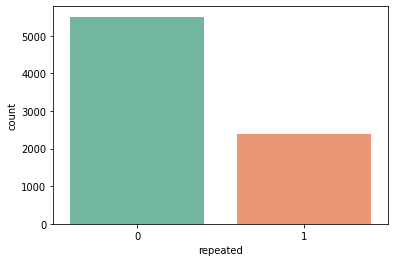

In [ ]:
sns.countplot(x = 'repeated', data = data)
work_data['repeated'].value_counts()/7900

1. varijabla = SCHOOL

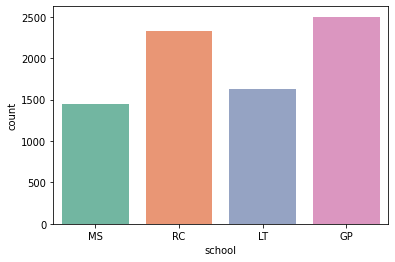

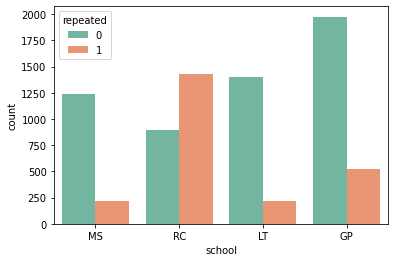

In [ ]:
sns.countplot(x = 'school', data = data)
plt.show()
data['school'].value_counts()
sns.countplot(x = 'school', hue = 'repeated',data = data)
plt.show()

In [ ]:
obs = pd.crosstab(data['school'],data['repeated'])
print(obs)
g, p, dof, expctd = chi2_contingency(obs,lambda_="log-likelihood")
print(p)

repeated     0     1
school              
GP        1975   527
LT        1403   222
MS        1234   214
RC         896  1429
0.0


$\chi^2$ test pokazuje ovisno varijable škola i ponavljanja godine. Možemo reći da ponavljanje godine ovisi o školi koju učenik pohađa. 

2.Varijabla = sex

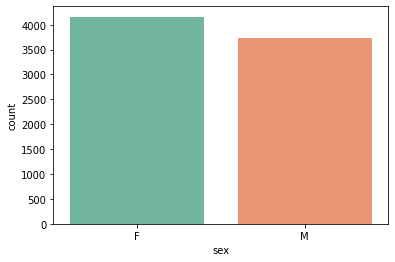

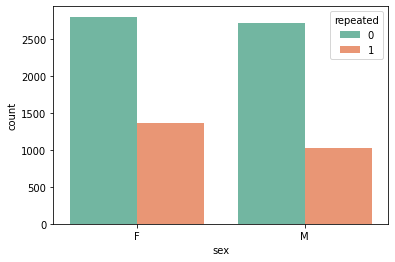

In [ ]:
sns.countplot(x = 'sex', data = data)
plt.show()
data['sex'].value_counts()
sns.countplot(x = 'sex', hue = 'repeated',data = data)
plt.show()

In [ ]:
obs = pd.crosstab(data['sex'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print(p)

repeated     1     0
sex                 
F         1361  2799
M         1031  2709
7.207292390507581e-07


In [ ]:
a = 1361/2799
b = 1031/2709
oddrat = a/b
print(oddrat)

1.2776313696626445


In [ ]:
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

OddsR:  1.2776313696626445 p-Value: 7.212931680765025e-07


3.varijabla = age

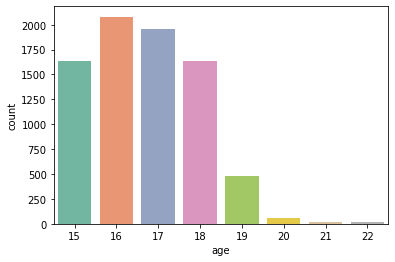

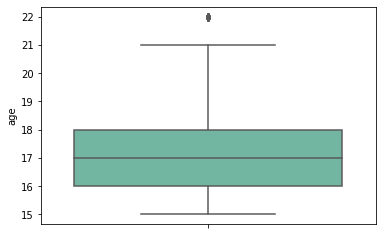

In [ ]:
sns.countplot(x='age',data=data)
plt.show()
sns.boxplot(y='age',data=data)
plt.show()

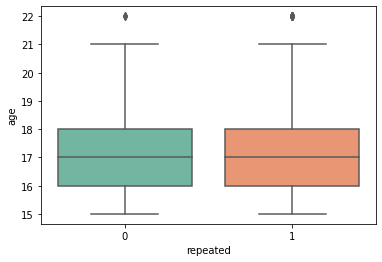

In [ ]:
sns.boxplot(y='age',x = 'repeated',data=data)
plt.show()

In [ ]:
r0 = data.age[data.repeated == 0]
r1 = data.age[data.repeated == 1]
s, p = stats.ttest_ind(r0,r1,equal_var = False)
print(p)

1.0255377075099464e-22


In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'repeated', 'data_perimeter'],
      dtype='object')

4.varijabla = address

Urban    0.777215
Rural    0.222785
Name: address, dtype: float64


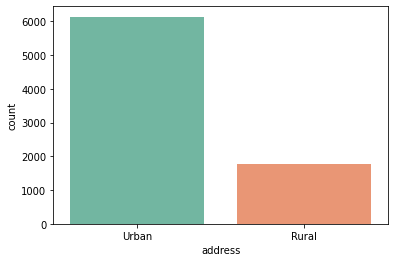

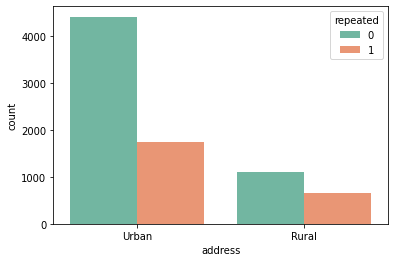

In [ ]:
print(data['address'].value_counts()/7900)
sns.countplot(x = 'address', data = data)
plt.show()
sns.countplot(x = 'address', hue = 'repeated',data = data)
plt.show()

In [ ]:
obs = pd.crosstab(data['address'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

repeated     1     0
address             
Rural      655  1105
Urban     1737  4403
chi2 test p-value:  1.6413675145703275e-12
OddsR:  1.5025463885567512 p-Value: 1.491683833664934e-12


5.varijabla = famsize

>3     0.711392
<=3    0.288608
Name: famsize, dtype: float64


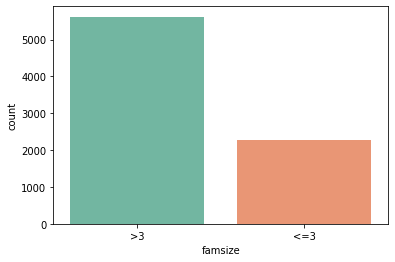

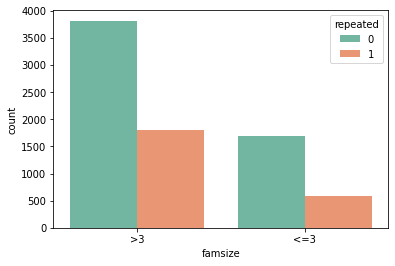

In [ ]:
print(data['famsize'].value_counts()/7900)
sns.countplot(x = 'famsize', data = data)
plt.show()
sns.countplot(x = 'famsize', hue = 'repeated',data = data)
plt.show()

In [ ]:
obs = pd.crosstab(data['famsize'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

repeated     1     0
famsize             
<=3        589  1691
>3        1803  3817
chi2 test p-value:  3.7887932365568124e-08
OddsR:  0.7373914885926701 p-Value: 3.47321369191552e-08


In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'repeated', 'data_perimeter'],
      dtype='object')

6.varijabla = Pstatus

Married     0.896203
Divorced    0.103797
Name: Pstatus, dtype: float64


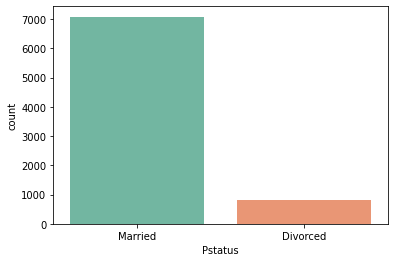

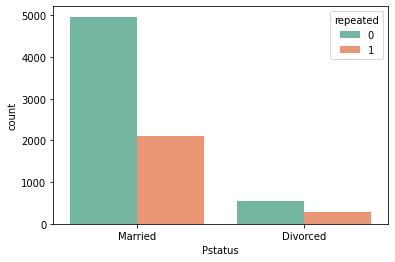

In [ ]:
print(data['Pstatus'].value_counts()/7900)
sns.countplot(x = 'Pstatus', data = data)
plt.show()
sns.countplot(x = 'Pstatus', hue = 'repeated',data = data)
plt.show()

In [ ]:
obs = pd.crosstab(data['Pstatus'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

repeated     1     0
Pstatus             
Divorced   278   542
Married   2114  4966
chi2 test p-value:  0.02011004261727061
OddsR:  1.2048895607215295 p-Value: 0.017869565928866786


7.Varijabla = Medu

4    0.331646
2    0.260759
3    0.250633
1    0.149367
0    0.007595
Name: Medu, dtype: float64


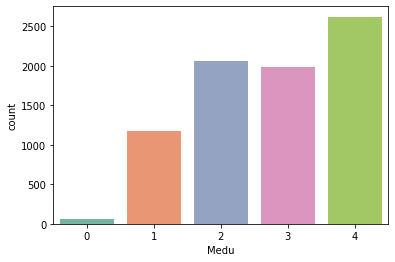

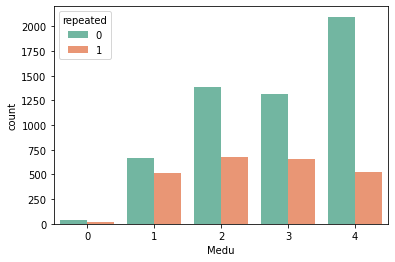

In [ ]:
print(data['Medu'].value_counts()/7900)
sns.countplot(x = 'Medu', data = data)
plt.show()
sns.countplot(x = 'Medu', hue = 'repeated',data = data)
plt.show()

In [ ]:
obs = pd.crosstab(data['Medu'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

repeated    1     0
Medu               
0          19    41
1         515   665
2         676  1384
3         660  1320
4         522  2098
chi2 test p-value:  1.9154892352225763e-53


8.Varijabla = Fedu

2    0.291139
3    0.253165
4    0.243038
1    0.207595
0    0.005063
Name: Fedu, dtype: float64


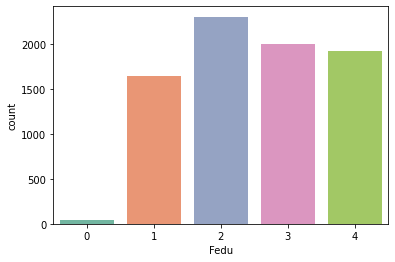

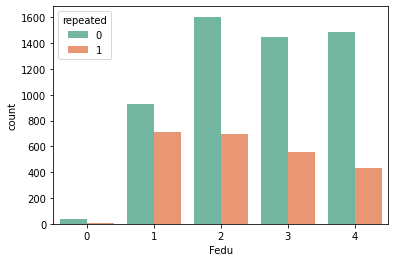

repeated    1     0
Fedu               
0           6    34
1         709   931
2         694  1606
3         553  1447
4         430  1490
chi2 test p-value:  7.80967622721655e-41


In [ ]:
print(data['Fedu'].value_counts()/7900)
sns.countplot(x = 'Fedu', data = data)
plt.show()
sns.countplot(x = 'Fedu', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['Fedu'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'repeated', 'data_perimeter'],
      dtype='object')

9.Varijabla = Mjob

other       0.356962
services    0.260759
at_home     0.149367
teacher     0.146835
health      0.086076
Name: Mjob, dtype: float64


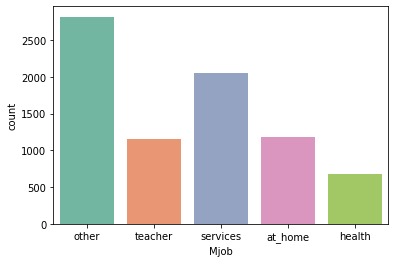

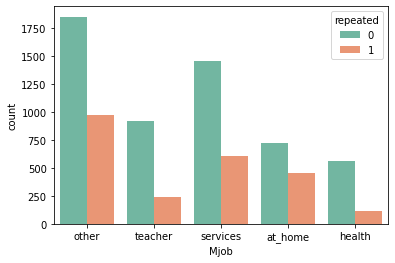

repeated    1     0
Mjob               
at_home   458   722
health    116   564
other     972  1848
services  602  1458
teacher   244   916
chi2 test p-value:  5.534005768615867e-37


In [ ]:
print(data['Mjob'].value_counts()/7900)
sns.countplot(x = 'Mjob', data = data)
plt.show()
sns.countplot(x = 'Mjob', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['Mjob'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

10.Varijabla = Fjob

other       0.549367
services    0.281013
teacher     0.073418
at_home     0.050633
health      0.045570
Name: Fjob, dtype: float64


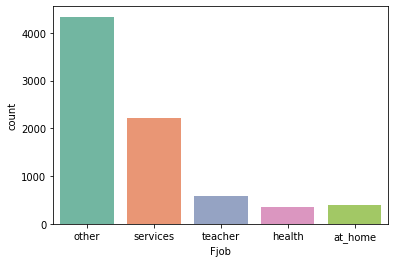

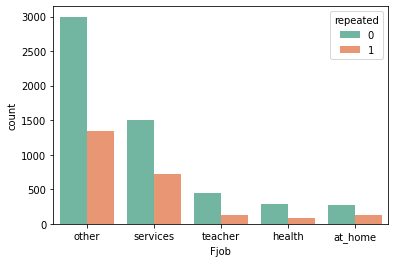

repeated     1     0
Fjob                
at_home    125   275
health      79   281
other     1344  2996
services   715  1505
teacher    129   451
chi2 test p-value:  2.360506464975341e-07


In [ ]:
print(data['Fjob'].value_counts()/7900)
sns.countplot(x = 'Fjob', data = data)
plt.show()
sns.countplot(x = 'Fjob', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['Fjob'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'repeated', 'data_perimeter'],
      dtype='object')

11.Varijabla = reason

course        0.367089
home          0.275949
reputation    0.265823
other         0.091139
Name: reason, dtype: float64


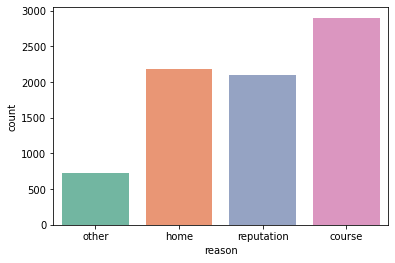

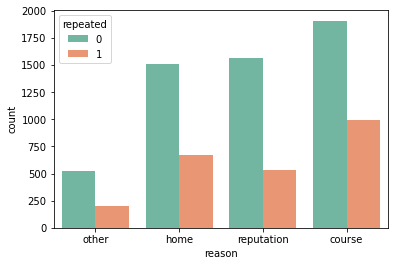

repeated      1     0
reason               
course      990  1910
home        667  1513
other       200   520
reputation  535  1565
chi2 test p-value:  5.704380116706152e-10


In [ ]:
print(data['reason'].value_counts()/7900)
sns.countplot(x = 'reason', data = data)
plt.show()
sns.countplot(x = 'reason', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['reason'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

12.Varijaba = guardian

mother    0.691139
father    0.227848
other     0.081013
Name: guardian, dtype: float64


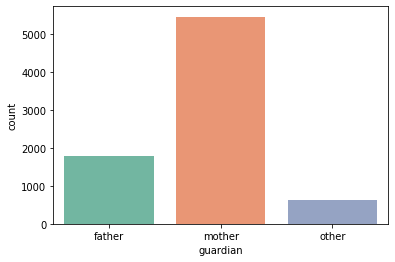

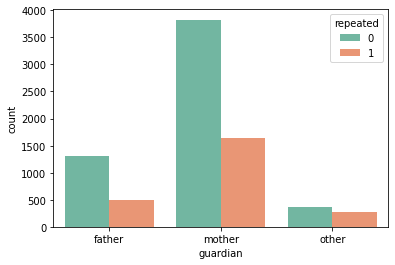

repeated     1     0
guardian            
father     486  1314
mother    1634  3826
other      272   368
chi2 test p-value:  4.410004950005862e-12


In [ ]:
print(data['guardian'].value_counts()/7900)
sns.countplot(x = 'guardian', data = data)
plt.show()
sns.countplot(x = 'guardian', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['guardian'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'repeated', 'data_perimeter'],
      dtype='object')

13.Varijabla = travel time

1    0.650633
2    0.270886
3    0.058228
4    0.020253
Name: traveltime, dtype: float64


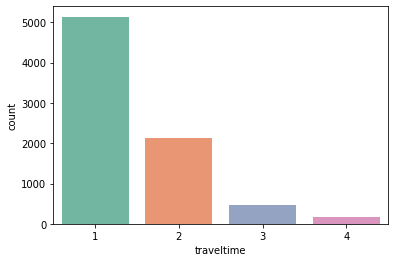

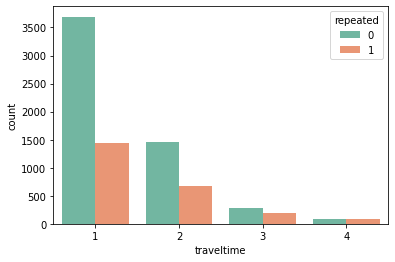

repeated       1     0
traveltime            
1           1448  3692
2            676  1464
3            186   274
4             82    78
chi2 test p-value:  6.397196838396823e-14


In [ ]:
print(data['traveltime'].value_counts()/7900)
sns.countplot(x = 'traveltime', data = data)
plt.show()
sns.countplot(x = 'traveltime', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['traveltime'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

14. Varijabla = study time

2    0.501266
1    0.265823
3    0.164557
4    0.068354
Name: studytime, dtype: float64


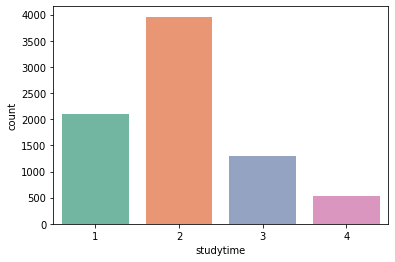

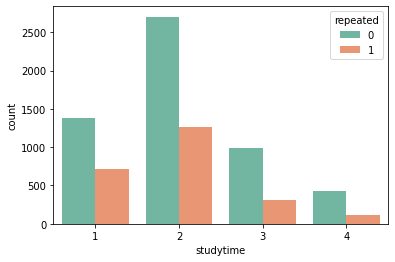

repeated      1     0
studytime            
1           713  1387
2          1257  2703
3           310   990
4           112   428
chi2 test p-value:  7.728917438749785e-15


In [ ]:
print(data['studytime'].value_counts()/7900)
sns.countplot(x = 'studytime', data = data)
plt.show()
sns.countplot(x = 'studytime', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['studytime'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

15.Varijabla = failures

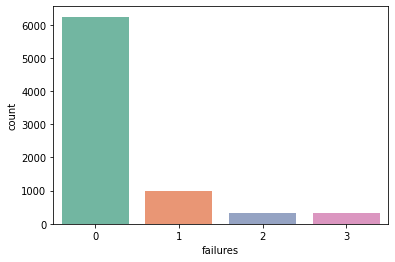

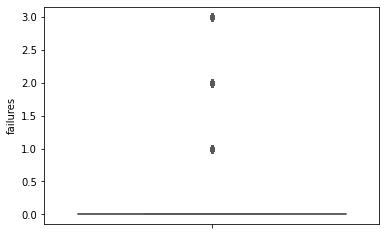

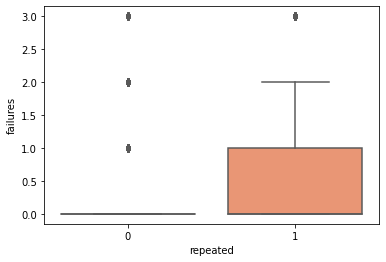

4.579804604592222e-158


In [ ]:
sns.countplot(x='failures',data=data)
plt.show()
sns.boxplot(y='failures',data=data)
plt.show()

sns.boxplot(y='failures',x = 'repeated',data=data)
plt.show()

r0 = data.failures[data.repeated == 0]
r1 = data.failures[data.repeated == 1]
s, p = stats.ttest_ind(r0,r1,equal_var = False)
print(p)

In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'repeated', 'data_perimeter'],
      dtype='object')

16.Varijabla = schoolsup

False    0.870886
True     0.129114
Name: schoolsup, dtype: float64


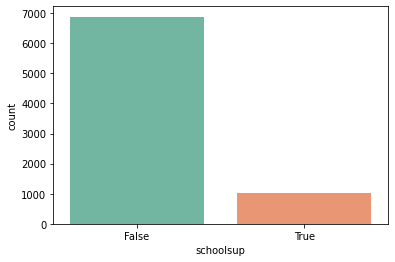

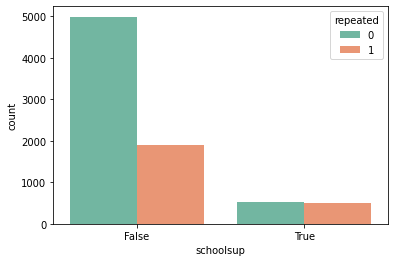

repeated      1     0
schoolsup            
False      1890  4990
True        502   518
chi2 test p-value:  4.7592532931427565e-42
OddsR:  0.39082946770034094 p-Value: 4.096583053399777e-42


In [ ]:
print(data['schoolsup'].value_counts()/7900)
sns.countplot(x = 'schoolsup', data = data)
plt.show()
sns.countplot(x = 'schoolsup', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['schoolsup'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

17.Varijabla = famsup

True     0.612658
False    0.387342
Name: famsup, dtype: float64


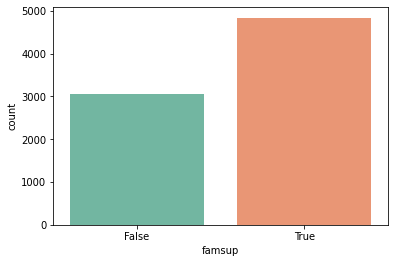

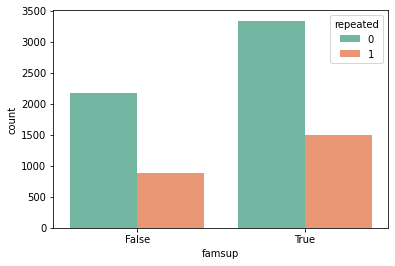

repeated     1     0
famsup              
False      889  2171
True      1503  3337
chi2 test p-value:  0.06236825883910615
OddsR:  0.9091575792067025 p-Value: 0.05948715290047382


In [3]:
print(data['famsup'].value_counts()/7900)
sns.countplot(x = 'famsup', data = data)
plt.show()
sns.countplot(x = 'famsup', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['famsup'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'repeated', 'data_perimeter'],
      dtype='object')

18.Varijabla = paid

False    0.541772
True     0.458228
Name: paid, dtype: float64


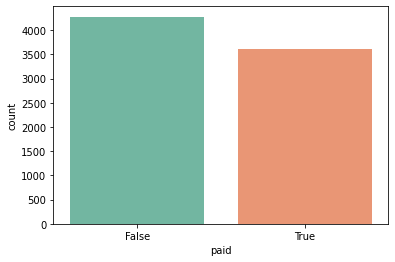

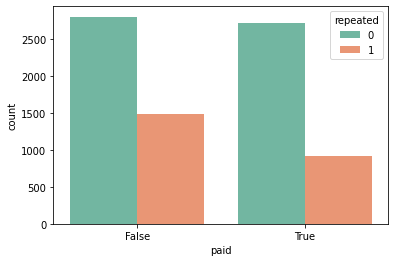

repeated     1     0
paid                
False     1483  2797
True       909  2711
chi2 test p-value:  3.341874896834814e-20
OddsR:  1.5813001750657725 p-Value: 2.7832144367976905e-20


In [5]:
print(data['paid'].value_counts()/7900)
sns.countplot(x = 'paid', data = data)
plt.show()
sns.countplot(x = 'paid', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['paid'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

19.Varijabla = activities

True     0.508861
False    0.491139
Name: activities, dtype: float64


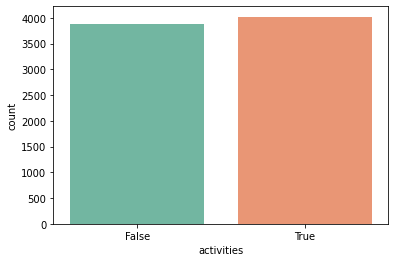

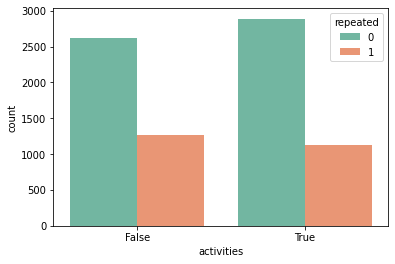

repeated       1     0
activities            
False       1262  2618
True        1130  2890
chi2 test p-value:  2.1716609498997473e-05
OddsR:  1.2328467992184806 p-Value: 2.0240483162911497e-05


In [7]:
print(data['activities'].value_counts()/7900)
sns.countplot(x = 'activities', data = data)
plt.show()
sns.countplot(x = 'activities', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['activities'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]])
print("chi2 test p-value: ",p)

oddsratio, pvalue = stats.fisher_exact(obs[[1,0]],lambda_="log-likelihood")
print("OddsR: ", oddsratio, "p-Value:", pvalue)

In [11]:
data.columns[19]

'nursery'

20.Varijabla = nursery

True     0.794937
False    0.205063
Name: nursery, dtype: float64


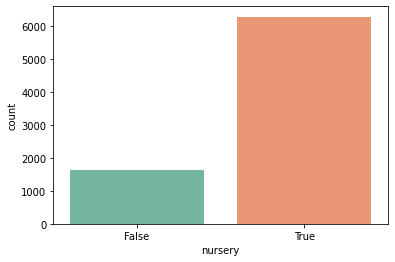

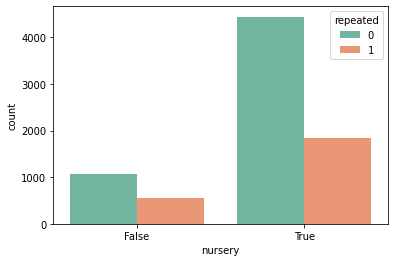

repeated     1     0
nursery             
False      554  1066
True      1838  4442
chi2 test p-value:  0.0001513966622120322
OddsR:  1.2559883387400042 p-Value: 0.00013250899187726252


In [15]:
print(data['nursery'].value_counts()/7900)
sns.countplot(x = 'nursery', data = data)
plt.show()
sns.countplot(x = 'nursery', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['nursery'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

In [16]:
data.columns[20]

'higher'

21.Varijabla = higher

True     0.949367
False    0.050633
Name: higher, dtype: float64


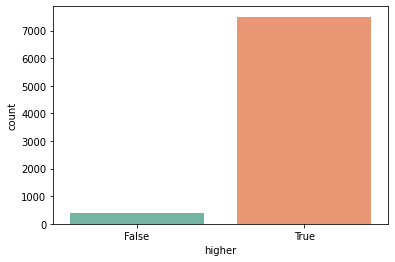

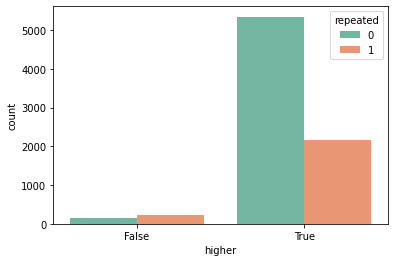

repeated     1     0
higher              
False      240   160
True      2152  5348
chi2 test p-value:  2.828038062777878e-36
OddsR:  3.7276951672862455 p-Value: 2.4518695989107403e-36


In [17]:
print(data['higher'].value_counts()/7900)
sns.countplot(x = 'higher', data = data)
plt.show()
sns.countplot(x = 'higher', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['higher'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

In [18]:
data.columns[21]

'internet'

22.Varijabla = internet

True     0.832911
False    0.167089
Name: internet, dtype: float64


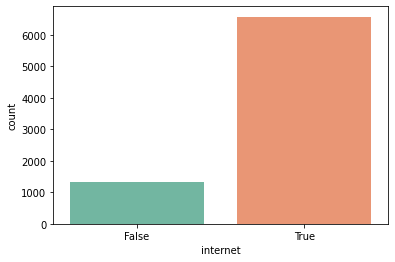

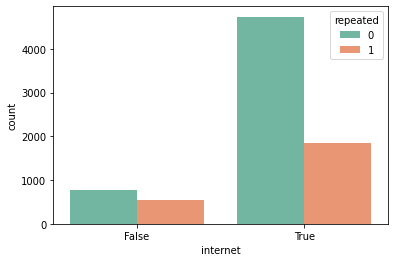

repeated     1     0
internet            
False      547   773
True      1845  4735
chi2 test p-value:  4.248255417311261e-21
OddsR:  1.8160652369783723 p-Value: 3.9542706762047546e-21


In [19]:
print(data['internet'].value_counts()/7900)
sns.countplot(x = 'internet', data = data)
plt.show()
sns.countplot(x = 'internet', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['internet'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

In [20]:
data.columns[22]

'romantic'

23.Varijalble = romantic

False    0.665823
True     0.334177
Name: romantic, dtype: float64


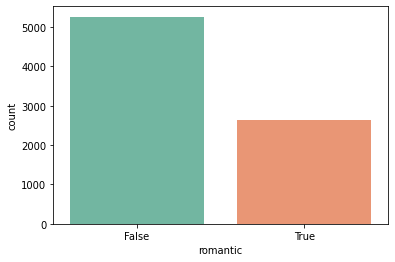

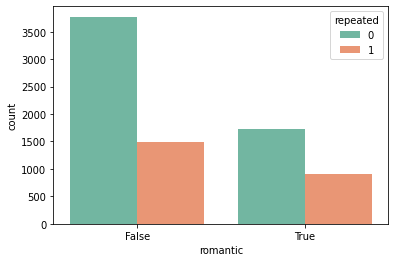

repeated     1     0
romantic            
False     1487  3773
True       905  1735
chi2 test p-value:  5.671201350897738e-08
OddsR:  0.7555706217336615 p-Value: 4.947518340552613e-08


In [21]:
print(data['romantic'].value_counts()/7900)
sns.countplot(x = 'romantic', data = data)
plt.show()
sns.countplot(x = 'romantic', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['romantic'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

In [22]:
data.columns[23]

'famrel'

24.Varijabla = famrel

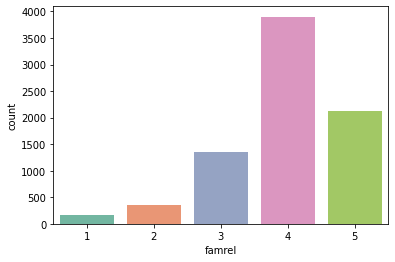

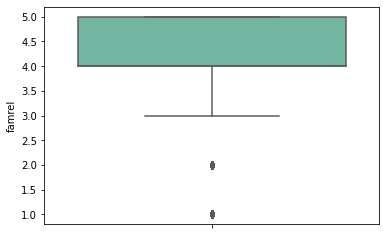

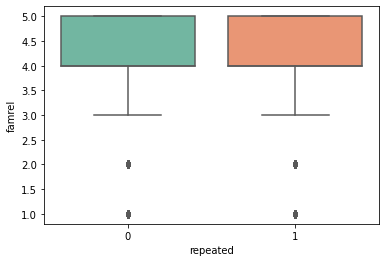

0.0619572539933194


In [24]:
sns.countplot(x='famrel',data=data)
plt.show()
sns.boxplot(y='famrel',data=data)
plt.show()

sns.boxplot(y='famrel',x = 'repeated',data=data)
plt.show()

r0 = data.famrel[data.repeated == 0]
r1 = data.famrel[data.repeated == 1]
s, p = stats.ttest_ind(r0,r1,equal_var = False)
print(p)

In [25]:
data.columns[24]

'freetime'

25.varijabla = freetime

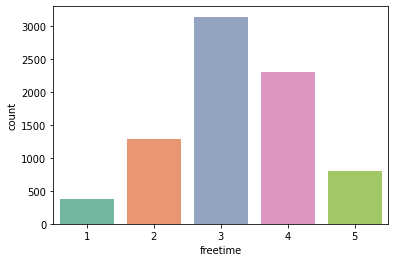

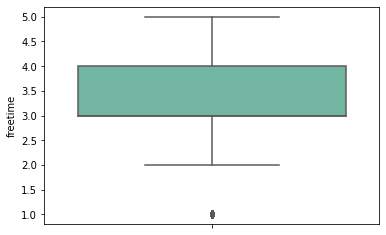

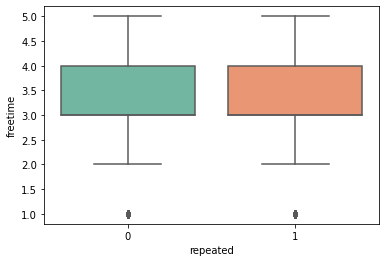

t-test:  0.46805219032412826
MVW:  0.20546894878059846


In [34]:
sns.countplot(x='freetime',data=data)
plt.show()
sns.boxplot(y='freetime',data=data)
plt.show()

sns.boxplot(y='freetime',x = 'repeated',data=data)
plt.show()

r0 = data.freetime[data.repeated == 0]
r1 = data.freetime[data.repeated == 1]
s, p = stats.ttest_ind(r0,r1,equal_var = False)
print('t-test: ',p)

stat, p = mannwhitneyu(r0,r1)
print('MVW: ',p)

In [30]:
data.columns[25]

'goout'

26.Varijaba = goout

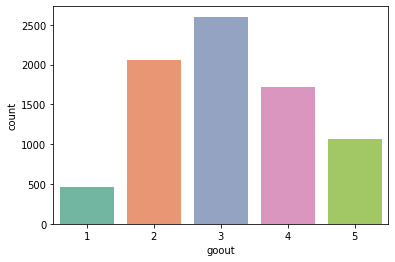

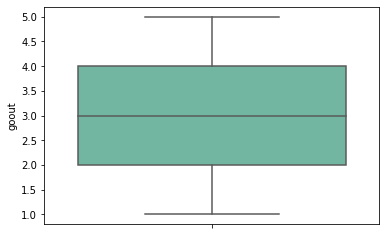

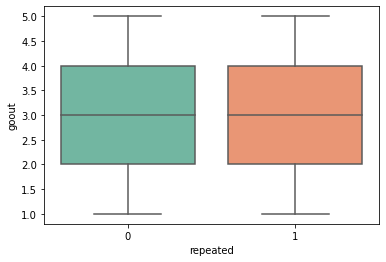

t-test:  9.782917131957893e-18
MVW:  9.942677972815905e-19


In [36]:
sns.countplot(x='goout',data=data)
plt.show()
sns.boxplot(y='goout',data=data)
plt.show()

sns.boxplot(y='goout',x = 'repeated',data=data)
plt.show()

r0 = data.goout[data.repeated == 0]
r1 = data.goout[data.repeated == 1]
s, p = stats.ttest_ind(r0,r1,equal_var = False)

print('t-test: ',p)

stat, p = mannwhitneyu(r0,r1)
print('MVW: ',p)


In [42]:
data.columns[26]

'Dalc'

27.varijabla = Dalc

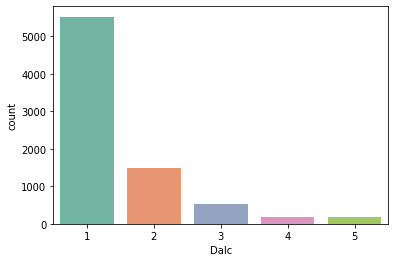

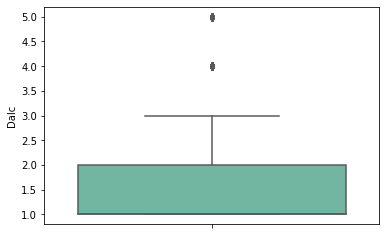

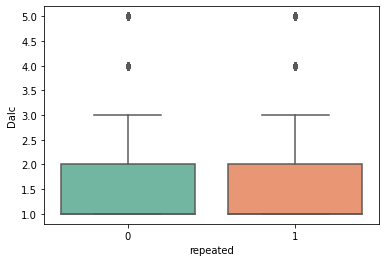

t-test:  3.8384849849422617e-10
MVW:  1.6764137055955005e-17


In [43]:
sns.countplot(x='Dalc',data=data)
plt.show()
sns.boxplot(y='Dalc',data=data)
plt.show()

sns.boxplot(y='Dalc',x = 'repeated',data=data)
plt.show()

r0 = data.Dalc[data.repeated == 0]
r1 = data.Dalc[data.repeated == 1]
s, p = stats.ttest_ind(r0,r1,equal_var = False)

print('t-test: ',p)

stat, p = mannwhitneyu(r0,r1)
print('MVW: ',p)

In [44]:
obs = pd.crosstab(data['Dalc'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

repeated     1     0
Dalc                
1         1504  4016
2          584   916
3          175   345
4           65   115
5           64   116
chi2 test p-value:  3.615058735586791e-17


In [46]:
data.columns[27]

'Walc'

28.Varijaba = Walc

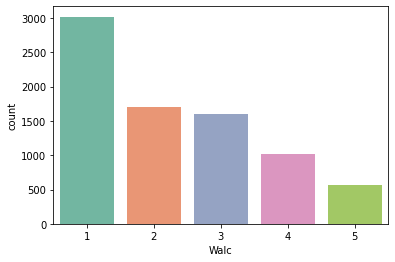

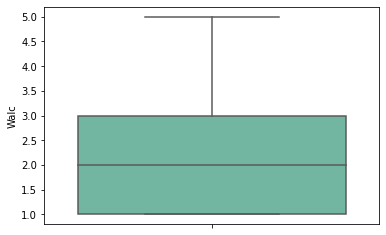

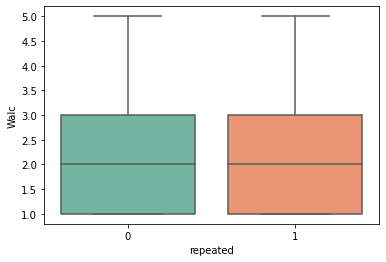

t-test:  3.223995095320207e-11
MVW:  1.4899780693003666e-10


In [47]:
sns.countplot(x='Walc',data=data)
plt.show()
sns.boxplot(y='Walc',data=data)
plt.show()

sns.boxplot(y='Walc',x = 'repeated',data=data)
plt.show()

r0 = data.Walc[data.repeated == 0]
r1 = data.Walc[data.repeated == 1]
s, p = stats.ttest_ind(r0,r1,equal_var = False)

print('t-test: ',p)

stat, p = mannwhitneyu(r0,r1)
print('MVW: ',p)

In [48]:
obs = pd.crosstab(data['Walc'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

repeated    1     0
Walc               
1         825  2195
2         502  1198
3         486  1114
4         343   677
5         236   324
chi2 test p-value:  5.95189649702558e-11


In [49]:
data.columns[28]

'health'

29.Varijabla = health

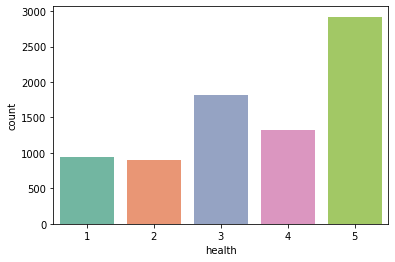

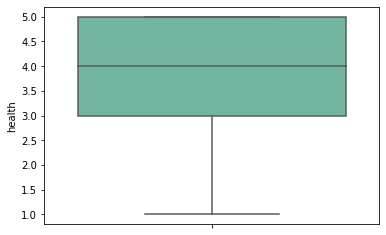

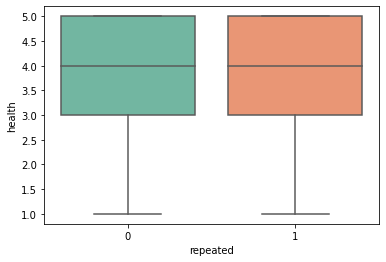

t-test:  0.00687297241751824
MVW:  0.034603087010724114


In [50]:
sns.countplot(x='health',data=data)
plt.show()
sns.boxplot(y='health',data=data)
plt.show()

sns.boxplot(y='health',x = 'repeated',data=data)
plt.show()

r0 = data.health[data.repeated == 0]
r1 = data.health[data.repeated == 1]
s, p = stats.ttest_ind(r0,r1,equal_var = False)

print('t-test: ',p)

stat, p = mannwhitneyu(r0,r1)
print('MVW: ',p)

In [51]:
obs = pd.crosstab(data['health'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

repeated    1     0
health             
1         213   727
2         283   617
3         576  1244
4         456   864
5         864  2056
chi2 test p-value:  2.3726140691651458e-08


In [53]:
data.columns[29]

'absences'

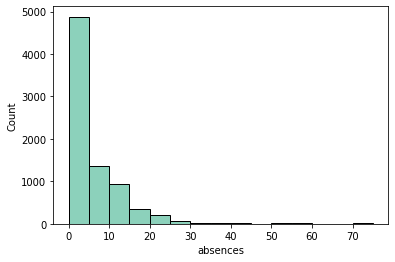

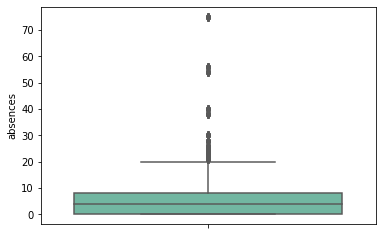

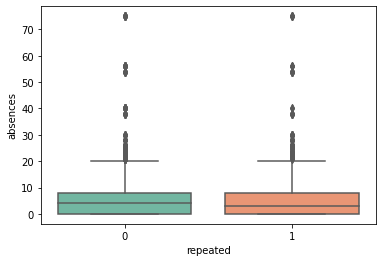

t-test:  0.7612144303599555
MVW:  0.0008616503324682099


In [66]:
sns.histplot(x='absences',data=data,bins=15)
plt.show()
sns.boxplot(y='absences',data=data)
plt.show()

sns.boxplot(y='absences',x = 'repeated',data=data)
plt.show()

r0 = data.absences[data.repeated == 0]
r1 = data.absences[data.repeated == 1]
s, p = stats.ttest_ind(r0,r1,equal_var = False)

print('t-test: ',p)

stat, p = mannwhitneyu(r0,r1)
print('MVW: ',p)